# Assignment 5: PCA and Clustering 

In [63]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
# sklearn
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.decomposition import PCA
from yellowbrick.cluster.elbow import kelbow_visualizer
from sklearn.cluster import KMeans


In [65]:
# global variables

DATASET_COLUMNS = ["area",
"perimeter",
"compactness",
"length_of_kernel",
"width_of_kernel",
"asymmetry_coefficient",
"length_of_kernel_groove",
"Target"]

## Part 1: Principle Component Analysis

In [66]:
# load data
df = pd.read_csv("seeds_dataset.txt", delimiter="\t", names=DATASET_COLUMNS)

In [67]:
df.head()

,area,perimeter,compactness,length_of_kernel,width_of_kernel,asymmetry_coefficient,length_of_kernel_groove,Target
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [68]:
# separate the feature and target vector
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

### Step 2: Preprocessing 

To preprocess the data, we will need to scale the data. Which scaler would you select and why?

For this dataset, standard scaling is recommended due to the implied Gaussian distribution. It enables meaningful feature comparisons, enhances model convergence, prevents undue influence from features solely based on their magnitude, and mitigates the impact of outliers.

In [69]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [70]:
# Print the shape of the training feature matrix and target vector
print(X_train.shape)
print(y_train.shape)

(157, 7)
(157,)


Now that we have our training data, we can implement our selected scaler.

In [71]:
# Scale the data
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.fit_transform(X_test)


### Step 3: Model Selection (1 mark)

The next step is to instantiate our selected model. In this case, we will be using `LogisticRegression()`

In [72]:
# Instantiate model
model = LogisticRegression()

### Step 4: Validation (2 marks)

To validate the results, we need to use cross-validation. To make sure we are using the best hyperparmeters, we can use a grid search. The parameter grid has been provided below.

In [73]:
param_grid = {'C': [0.01, 0.1, 1.0, 10.0],
             'fit_intercept': [True, False]}

In [74]:
#grid search and print the best parameters, cross-validation score and test score
grid = GridSearchCV(model, param_grid, cv=5)
grid.fit(scaled_X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1.0, 10.0],
                         'fit_intercept': [True, False]})

In [75]:
print(f"Best grid estimator: {grid.best_estimator_}")
print(f"Best grid parameters: {grid.best_params_}")
print(f"Best grid score: {grid.best_score_}")

Best grid estimator: LogisticRegression(C=10.0)
Best grid parameters: {'C': 10.0, 'fit_intercept': True}
Best grid score: 0.9368951612903226


In [76]:
y_pred = grid.predict(scaled_X_test)
test_score = accuracy_score(y_test, y_pred)
print("Test Score:", test_score)

Test Score: 0.9433962264150944


### Step 5: Visualize using PCA (3 marks)

Now you can visualize the results from Step 4 using PCA. Use the best parameters from the previous step to predict the label for the testing data. For the plot, each data point must be colored based on the class label.

In [77]:
# Predict y labels using best estimator
pred_label = grid.best_estimator_.predict(scaled_X_test)
pred_label

array([1, 2, 1, 1, 3, 2, 2, 2, 2, 3, 1, 3, 1, 3, 2, 2, 3, 1, 1, 1, 3, 1,
       1, 1, 2, 2, 2, 1, 3, 3, 2, 3, 1, 2, 3, 3, 3, 2, 1, 1, 3, 1, 2, 3,
       1, 2, 2, 1, 1, 2, 1, 2, 3], dtype=int64)

In [78]:
# Reduce dimensions of test data for plotting
pca = PCA(n_components=2)
projected = pca.fit_transform(scaled_X_test)

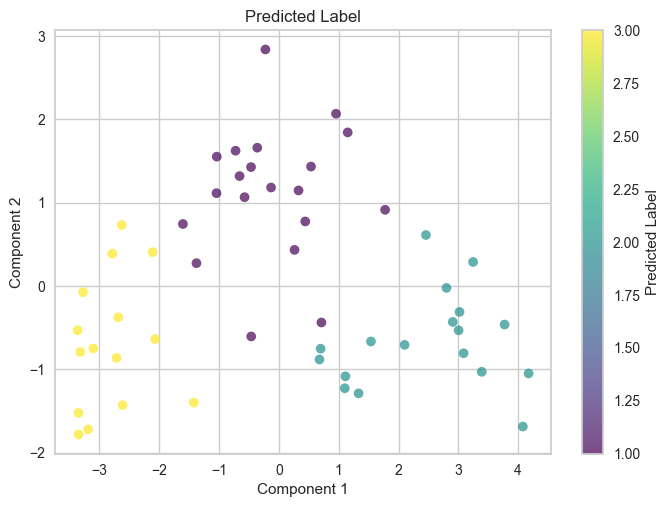

In [79]:
# Plot test points colored by predicted label
plt.scatter(projected[:, 0], projected[:, 1], c=pred_label, edgecolor="none", alpha=0.7, cmap="viridis")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.colorbar(label="Predicted Label")
plt.title("Predicted Label")
plt.show()

#### Questions (4 marks)

1. Did the logistic regression model work well for this dataset? Why would you make this conclusion? *(2 marks)*
1. Did PCA work well for this model? How does this relate to the results from the model used? *(2 marks)*

*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 2. Implement clustering

### Step 1: Cluster using original data

In [80]:
# reload dataset
df = pd.read_csv("seeds_dataset.txt", delimiter="\t", names=DATASET_COLUMNS)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# scale df
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

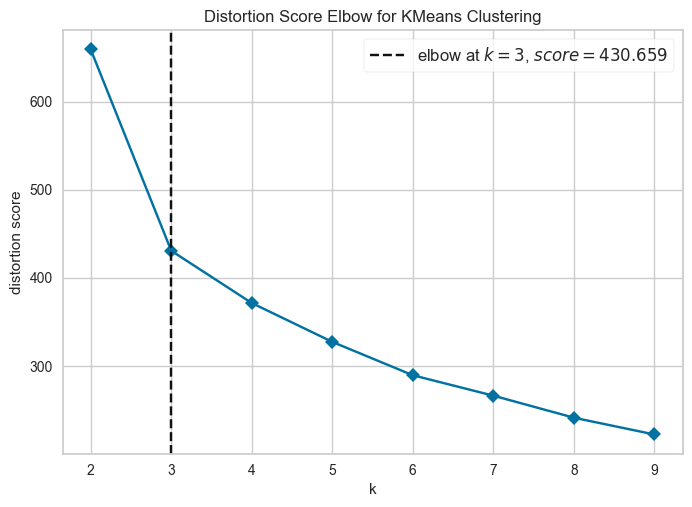

In [81]:
# Use the elbow method to determine the optimal number of clusters
ke=kelbow_visualizer(KMeans(random_state=4, n_init=10), scaled_X, k=(2,10), metric="distortion", timings=False)

In [82]:
# optimal cluster values
n_clusters = ke.elbow_value_

In [83]:
# Implement K-means
kmeans = KMeans(n_clusters=n_clusters, random_state=0)
kmeans.fit(scaled_X)

c:\Users\chris\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=0)

In [84]:
# Evaluate clusters
test_clusters = kmeans.predict(scaled_X)

In [85]:
# Calculate the sil score
average_sil_score = silhouette_score(scaled_X, test_clusters)

print(f"Silhouette Score: {average_sil_score}")

Silhouette Score: 0.40072705527512986


In [86]:
# Calculate cal score
average_cal_score = calinski_harabasz_score(scaled_X, test_clusters)
print(f"Calinski-Harabasz score {average_cal_score}")

Calinski-Harabasz score 249.7841749161647


In [94]:
# Calculate dav score
average_dav_score = davies_bouldin_score(scaled_X, test_clusters)
print(f"Davies-Bouldin score {average_dav_score}")

Davies-Bouldin score 0.9278712249013426


Plot the clustering results using PCA. Remember to color each data point based on the cluster label.

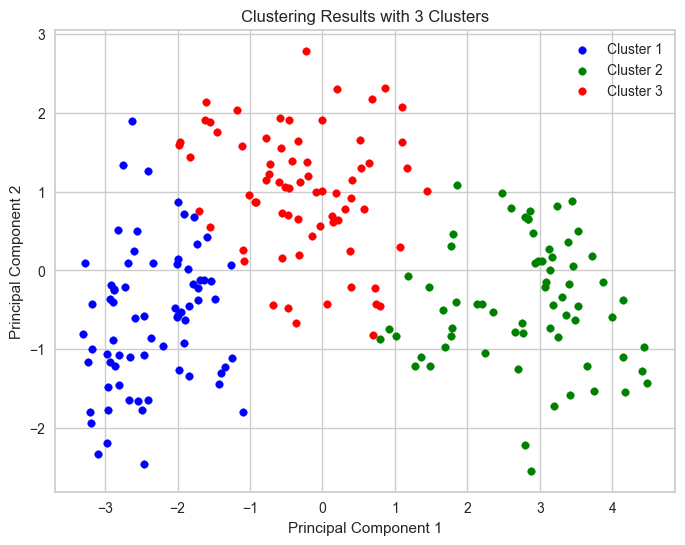

In [99]:
# Plot clustering results
pca = PCA(n_components=2)
cluster_assignments = kmeans.predict(scaled_X)
pca_transformed = pca.fit_transform(scaled_X)

# Plot the PCA-reduced data with the cluster assignments
plt.figure(figsize=(8, 6))

# Colors for each cluster
colors = ['blue', 'green', 'red']

# Loop through each cluster and plot them with different colors
for i in range(n_clusters):
    points = pca_transformed[cluster_assignments == i]
    plt.scatter(points[:, 0], points[:, 1], s=30, c=colors[i], label=f'Cluster {i+1}')

plt.title(f'Clustering Results with {n_clusters} Clusters')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

### Step 2: Cluster using PCA-transformed data (4 marks)

Implement Kmeans clustering using PCA-transformed data. The first step is to use the explained variance ratio to find the number of components required to explain at least 95% of the variance.

In [89]:
# TODO: Find the number of principal components using explained variance ratio

Next, transform the data using PCA, implement Kmeans and calculate the three validation metrics used in the previous step.

In [90]:
# TODO: Use PCA to transform the data

In [91]:
# TODO: Implement K-means with the transformed data

In [92]:
# TODO: Calculate the three different validation metrics

### Step 3: Display results (2 marks)

Print the results for Steps 2 and 3 in a table. Include column and row labels

In [93]:
# TODO: Display results

#### Questions (4 marks)

1. Did the optimal number of clusters make sense based on the context? *(1 mark)*
1. Compare the PCA plot from Part 2 step 1 to the PCA plot from Part 1. Did we get similar results? *(1 mark)*
1. How many components did you use for the PCA analysis? Did using PCA improve your results? Why or why not? *(2 marks)*


*ANSWER HERE*

### Process Description (4 marks)
Please describe the process you used to create your code. Cite any websites or generative AI tools used. You can use the following questions as guidance:
1. Where did you source your code?
1. In what order did you complete the steps?
1. If you used generative AI, what prompts did you use? Did you need to modify the code at all? Why or why not?
1. Did you have any challenges? If yes, what were they? If not, what helped you to be successful?

*DESCRIBE YOUR PROCESS HERE*

## Part 3: Reflection (2 marks)
Include a sentence or two about:
- what you liked or disliked,
- found interesting, confusing, challangeing, motivating
while working on this assignment.


*ADD YOUR THOUGHTS HERE*